Notebook created: 2018-05-23 03:37:54  
Generated from: _build_jl/jl/finite_markov.rst  

In [1]:
using QuantEcon

ψ = [0.1, 0.9];        # Probabilities over sample space {1, 2}
d = DiscreteRV(ψ);
rand(d, 5)             # Generate 5 independent draws from ψ

5-element Array{Int64,1}:
 2
 2
 1
 2
 2

```none
5-element Array{Int64,1}:
 1
 2
 2
 1
 2
```


In [2]:
function mc_sample_path(P; init=1, sample_size=1000)
    X = Array{Int64}(sample_size) # allocate memory
    X[1] = init
    # === convert each row of P into a distribution === #
    n = size(P)[1]
    P_dist = [DiscreteRV(vec(P[i,:])) for i in 1:n]

    # === generate the sample path === #
    for t in 1:(sample_size - 1)
        X[t+1] = rand(P_dist[X[t]])
    end
    return X
end

mc_sample_path (generic function with 1 method)

In [3]:
P = [0.4 0.6; 0.2 0.8]
X = mc_sample_path(P, sample_size=100000);
println(mean(X .== 1))

0.24853


```none
0.25171
```


In [4]:
P = [0.4 0.6; 0.2 0.8];
mc = MarkovChain(P)
X = simulate(mc, 100000);
mean(X .== 1)             # Should be close to 0.25

0.25084

```none
0.25031
```


In [5]:
mc = MarkovChain(P, ["unemployed", "employed"])
simulate(mc, 4, init=1)   # Start at state 1

4-element Array{String,1}:
 "unemployed"
 "unemployed"
 "employed"  
 "employed"  

```none
4-element Array{String,1}:
 "employed"
 "employed"
 "unemployed"
 "unemployed"
```


In [6]:
simulate(mc, 4, init=2)  # Start at state 2

4-element Array{String,1}:
 "employed"  
 "unemployed"
 "employed"  
 "unemployed"

```none
4-element Array{String,1}:
 "unemployed"
 "unemployed"
 "unemployed"
 "unemployed"
```


In [7]:
simulate(mc, 4)          # Start with randomly chosen initial condition

4-element Array{String,1}:
 "unemployed"
 "unemployed"
 "unemployed"
 "employed"  

```none
4-element Array{String,1}:
 "employed"
 "unemployed"
 "unemployed"
 "employed"
```


In [8]:
simulate_indices(mc, 4)

4-element Array{Int64,1}:
 1
 2
 2
 1

```none
4-element Array{Int64,1}:
 1
 1
 2
 2
```


In [9]:
P = [0.9 0.1 0.0; 0.4 0.4 0.2; 0.1 0.1 0.8];
mc = MarkovChain(P)
is_irreducible(mc)

true

```none
true
```


In [10]:
P = [1.0 0.0 0.0; 0.1 0.8 0.1; 0.0 0.2 0.8];
mc = MarkovChain(P);
is_irreducible(mc)

false

```none
false
```


In [11]:
communication_classes(mc)

2-element Array{Array{Int64,1},1}:
 [1]   
 [2, 3]

```none
2-element Array{Array{Int64,1},1}:
 [1]
 [2,3]
```


In [ ]:
P = [0 1 0; 0 0 1; 1 0 0];
mc = MarkovChain(P);
period(mc)

```none
3
```


In [12]:
P = zeros(4, 4);
P[1, 2] = 1;
P[2, 1] = P[2, 3] = 0.5;
P[3, 2] = P[3, 4] = 0.5;
P[4, 3] = 1;
mc = MarkovChain(P);
period(mc)

2

```none
2
```


In [ ]:
is_aperiodic(mc)

```none
false
```


In [ ]:
P = [.4 .6; .2 .8];
ψ = [0.25, 0.75];
ψ' * P

```none
1×2 Array{Float64,2}:
 0.25  0.75
```


In [13]:
P = [.4 .6; .2 .8];
mc = MarkovChain(P);
stationary_distributions(mc)

1-element Array{Array{Float64,1},1}:
 [0.25, 0.75]

```none
1-element Array{Array{Float64,1},1}:
 [0.25,0.75]
```


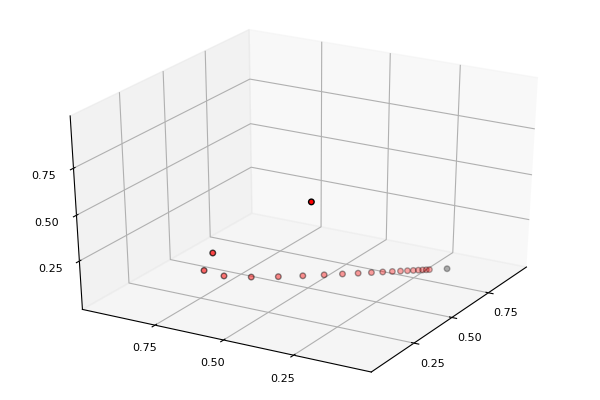

In [14]:
using Plots
pyplot()

P = [0.971 0.029 0.000
     0.145 0.778 0.077
     0.000 0.508 0.492]

ψ = [0.0 0.2 0.8]

t = 20
x_vals = Array{Float64}(t+1)
y_vals = Array{Float64}(t+1)
z_vals = Array{Float64}(t+1)
colors = []

for i=1:t
    x_vals[i] = ψ[1]
    y_vals[i] = ψ[2]
    z_vals[i] = ψ[3]
    ψ = ψ*P
    push!(colors, :red)
end
push!(colors, :black)

mc = MarkovChain(P)
ψ_star = stationary_distributions(mc)[1]
x_vals[t+1] = ψ_star[1]
y_vals[t+1] = ψ_star[2]
z_vals[t+1] = ψ_star[3]
scatter(x_vals, y_vals, z_vals, color=colors)
plot!(lims=(0, 1), ticks=[0.25 0.5 0.75]', legend=:none, camera=(300, 30))

```none
d -> h;
```


```jlcon
matchall(r"\w", "x +++ y ****** z")
```


```none
3-element Array{SubString{String},1}:
 "x"
 "y"
 "z"
```


```jlcon
matchall(r"\w", "a ^^ b &&& \$\$ c")
```


```none
3-element Array{SubString{String},1}:
 "a"
 "b"
 "c"
```


In [15]:
using LaTeXStrings

In [16]:
α = β = 0.1
N = 10000
p = β / (α + β)

P = [1 - α       α   # Careful: P and p are distinct
         β   1 - β]

mc = MarkovChain(P)

Discrete Markov Chain
stochastic matrix of type Array{Float64,2}:
[0.9 0.1; 0.1 0.9]

```none
Discrete Markov Chain
stochastic matrix of type Array{Float64,2}:
[0.9 0.1; 0.1 0.9]
```


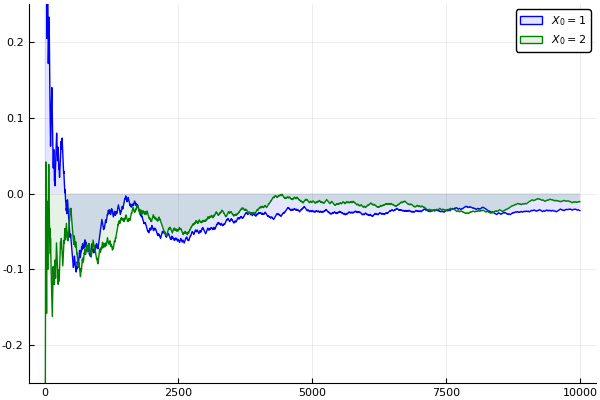

In [17]:
labels = []
y_vals = []

for x0 = 1:2
    # == Generate time series for worker that starts at x0 == #
    X = simulate_indices(mc, N; init=x0)

    # == Compute fraction of time spent unemployed, for each n == #
    X_bar = cumsum(X.==1) ./ (collect(1:N))

    l = LaTeXString("\$X_0 = $x0\$")
    push!(labels, l)
    push!(y_vals, X_bar - p)
end

plot(y_vals, color=[:blue :green], fillrange=0, fillalpha=0.1,
     ylims=(-0.25, 0.25), label=reshape(labels,1,length(labels)))

In [18]:
f = open("web_graph_data.txt", "w")
contents = """a -> d;
a -> f;
b -> j;
b -> k;
b -> m;
c -> c;
c -> g;
c -> j;
c -> m;
d -> f;
d -> h;
d -> k;
e -> d;
e -> h;
e -> l;
f -> a;
f -> b;
f -> j;
f -> l;
g -> b;
g -> j;
h -> d;
h -> g;
h -> l;
h -> m;
i -> g;
i -> h;
i -> n;
j -> e;
j -> i;
j -> k;
k -> n;
l -> m;
m -> g;
n -> c;
n -> j;
n -> m;
"""
write(f, contents)
close(f)

In [19]:
#=
Return list of pages, ordered by rank
=#

infile = "web_graph_data.txt"
alphabet = "abcdefghijklmnopqrstuvwxyz"

n = 14 # Total number of web pages (nodes)

# == Create a matrix Q indicating existence of links == #
#  * Q[i, j] = 1 if there is a link from i to j
#  * Q[i, j] = 0 otherwise
Q = zeros(Int64, n, n)
f = open(infile, "r")
edges = readlines(f)
close(f)
for edge in edges
    from_node, to_node = matchall(r"\w", edge)
    i = searchindex(alphabet, from_node)
    j = searchindex(alphabet, to_node)
    Q[i, j] = 1
end

# == Create the corresponding Markov matrix P == #
P = Array{Float64}(n, n)
for i=1:n
    P[i, :] = Q[i, :] / sum(Q[i, :])
end

mc = MarkovChain(P)

# == Compute the stationary distribution r == #
r = stationary_distributions(mc)[1]
ranked_pages = Dict(alphabet[i] => r[i] for i=1:n)

# == Print solution, sorted from highest to lowest rank == #
println("Rankings\n ***")
sort_inds = reverse!(sortperm(collect(values(ranked_pages))))
the_keys = collect(keys(ranked_pages))
the_vals = collect(values(ranked_pages))
for i in sort_inds
    @printf("%s: %.4f\n", the_keys[i], the_vals[i])
end

Rankings
 ***
g: 0.1607
j: 0.1594
m: 0.1195
n: 0.1088
k: 0.0911
b: 0.0833
i: 0.0531
e: 0.0531
c: 0.0483
h: 0.0456
l: 0.0320
d: 0.0306
f: 0.0116
a: 0.0029


```none
Rankings
 ***
g: 0.1607
j: 0.1594
m: 0.1195
n: 0.1088
k: 0.0911
b: 0.0833
i: 0.0531
e: 0.0531
c: 0.0483
h: 0.0456
l: 0.0320
d: 0.0306
f: 0.0116
a: 0.0029
```
